In [22]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv("date-hour-soo-dest-2017.csv")
df.head()

Origin Destination  Throughput             DateTime
0   12TH        19TH           1  2017-01-01 00:00:00
1   12TH        24TH           2  2017-01-01 00:00:00
2   12TH        BAYF           1  2017-01-01 00:00:00
3   12TH        CIVC           5  2017-01-01 00:00:00
4   12TH        COLS           2  2017-01-01 00:00:00

In [24]:
df.sample(7)

Origin Destination  Throughput             DateTime
131116    CAST        SANL           1  2017-01-06 07:00:00
3195197   WSPR        ROCK           1  2017-04-29 17:00:00
2082411   COLS        FTVL          16  2017-03-20 09:00:00
845544    GLEN        PHIL           2  2017-02-02 09:00:00
1021786   COLS        BAYF          11  2017-02-08 21:00:00
2223602   SBRN        PHIL           1  2017-03-25 09:00:00
1048528   SFIA        MCAR          11  2017-02-09 19:00:00

In [25]:
df["DateTime"].unique()

array(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
       '2017-01-01 02:00:00', ..., '2017-05-03 21:00:00',
       '2017-05-03 22:00:00', '2017-05-03 23:00:00'], dtype=object)

In [26]:
#birleşik olan tarih bilgisni ayırıyoruz
df["DateTime"]=pd.to_datetime(df["DateTime"])

In [27]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df['Weekday']=df['DateTime'].dt.dayofweek
df['Month_Name']=df['DateTime'].dt.month_name()
df['Weekday_Name']=df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

df=df.drop('DateTime',axis=1)
df.head()

Origin Destination  Throughput  Year  Month  Weekday Month_Name  \
0   12TH        19TH           1  2017      1        6    January   
1   12TH        24TH           2  2017      1        6    January   
2   12TH        BAYF           1  2017      1        6    January   
3   12TH        CIVC           5  2017      1        6    January   
4   12TH        COLS           2  2017      1        6    January   

  Weekday_Name  Hour  
0       Sunday     0  
1       Sunday     0  
2       Sunday     0  
3       Sunday     0  
4       Sunday     0

In [29]:
df.sample(7) #rastgele yedi tanesi

Origin Destination  Throughput  Year  Month  Weekday Month_Name  \
717039    POWL        ROCK          20  2017      1        5    January   
2744447   12TH        SFIA           3  2017      4        3      April   
1184319   16TH        12TH          20  2017      2        1   February   
1738925   FRMT        ROCK           3  2017      3        1      March   
2489795   ORIN        LAKE           1  2017      4        1      April   
2907734   SANL        GLEN           1  2017      4        2      April   
919850    GLEN        ASHB           2  2017      2        5   February   

        Weekday_Name  Hour  
717039      Saturday    13  
2744447     Thursday    14  
1184319      Tuesday    22  
1738925      Tuesday    16  
2489795      Tuesday     6  
2907734    Wednesday    14  
919850      Saturday    23

In [31]:
df["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313625 entries, 0 to 3313624
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Origin        object
 1   Destination   object
 2   Throughput    int64 
 3   Year          int64 
 4   Month         int64 
 5   Weekday       int64 
 6   Month_Name    object
 7   Weekday_Name  object
 8   Hour          int64 
dtypes: int64(5), object(4)
memory usage: 227.5+ MB


In [33]:
df.corr()

Throughput  Year     Month   Weekday      Hour
Throughput    1.000000   NaN  0.003401 -0.070477 -0.008184
Year               NaN   NaN       NaN       NaN       NaN
Month         0.003401   NaN  1.000000 -0.022919 -0.000233
Weekday      -0.070477   NaN -0.022919  1.000000  0.048373
Hour         -0.008184   NaN -0.000233  0.048373  1.000000

In [34]:
df.describe()

Throughput       Year         Month       Weekday          Hour
count  3.313625e+06  3313625.0  3.313625e+06  3.313625e+06  3.313625e+06
mean   1.253642e+01     2017.0  2.584184e+00  2.811603e+00  1.364138e+01
std    3.345597e+01        0.0  1.176325e+00  1.938180e+00  5.640974e+00
min    1.000000e+00     2017.0  1.000000e+00  0.000000e+00  0.000000e+00
25%    2.000000e+00     2017.0  2.000000e+00  1.000000e+00  9.000000e+00
50%    4.000000e+00     2017.0  3.000000e+00  3.000000e+00  1.400000e+01
75%    9.000000e+00     2017.0  4.000000e+00  4.000000e+00  1.800000e+01
max    1.826000e+03     2017.0  5.000000e+00  6.000000e+00  2.300000e+01

In [35]:
df["Throughput"].value_counts().describe() #sadece bu verinin istatistiği

count       868.000000
mean       3817.540323
std       36809.852892
min           1.000000
25%           4.000000
50%          23.000000
75%         170.500000
max      825393.000000
Name: Throughput, dtype: float64

In [36]:
abs(df.corr()["Throughput"]).sort_values(ascending=False) #gerek yoktu ama bi bakalım dedik

Throughput    1.000000
Weekday       0.070477
Hour          0.008184
Month         0.003401
Year               NaN
Name: Throughput, dtype: float64

In [37]:
df.isnull().sum() #boş verimiz yok çok şükür :)

Origin          0
Destination     0
Throughput      0
Year            0
Month           0
Weekday         0
Month_Name      0
Weekday_Name    0
Hour            0
dtype: int64

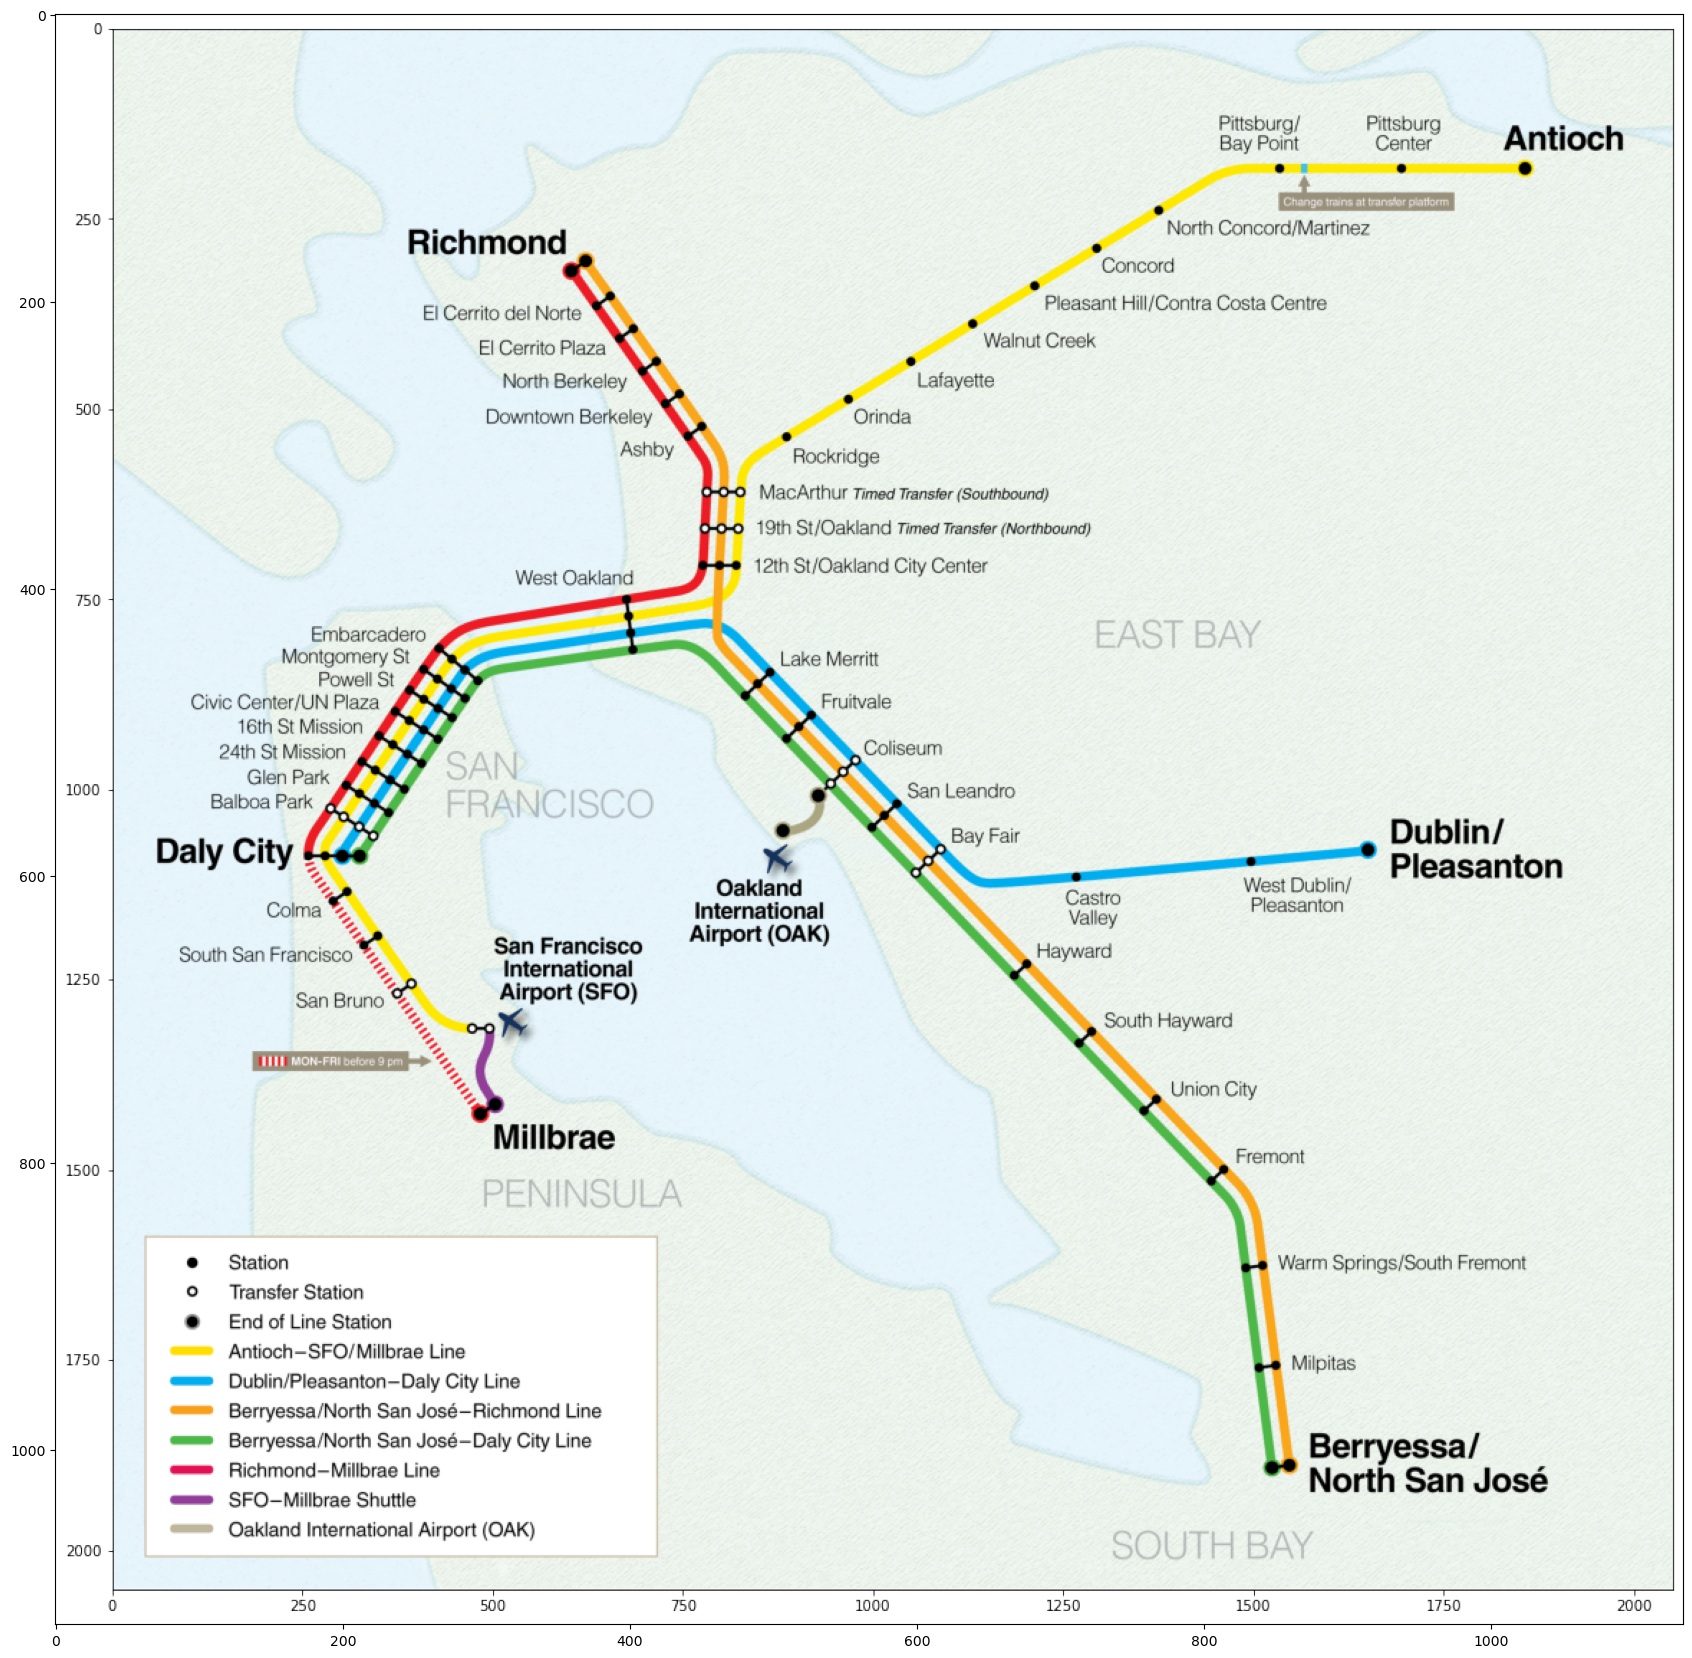

In [38]:
plt.figure(figsize=(21,21))
img=plt.imread("bartresim.png")
plt.imshow(img)
plt.show();

In [39]:
df["Origin"].unique() #kalkışyeri

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object)

In [40]:
df["Destination"].unique() #varışyeri

array(['19TH', '24TH', 'BAYF', 'CIVC', 'COLS', 'DALY', 'DBRK', 'DELN',
       'EMBR', 'FTVL', 'GLEN', 'HAYW', 'MCAR', 'MONT', 'ORIN', 'PHIL',
       'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'WCRK', '12TH',
       '16TH', 'BALB', 'CAST', 'CONC', 'DUBL', 'FRMT', 'LAFY', 'LAKE',
       'MLBR', 'SBRN', 'SFIA', 'UCTY', 'WDUB', 'WOAK', 'ASHB', 'NBRK',
       'SHAY', 'COLM', 'SSAN', 'NCON', 'OAKL', 'WSPR'], dtype=object)

In [41]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [42]:
#ülke kodlarının açılımlarına bakalım ws ile
df1=pd.read_html('https://paintmaps.com/tr/ulke-bilgileri/ulke_kodu')[0]
df1

ÜLKE ÜLKE KODU (2 harf)  \
0                                       Afganistan                 AF   
1                                    Aland adaları                 AX   
2                                          Almanya                 DE   
3                      Amerika Birleşik Devletleri                 US   
4    Amerika Birleşik Devletleri Küçük Dış Adaları                 UM   
..                                             ...                ...   
242                                 Yeni Kaledonya                 NC   
243                                   Yeni Zelanda                 NZ   
244                                     Yunanistan                 GR   
245                                        Zambiya                 ZM   
246                                       Zimbabve                 ZW   

    ÜLKE KODU (3 harf)  
0                  AFG  
1                  ALA  
2                  DEU  
3                  USA  
4                  UMI  
..                 ...  
242                NCL  
243                NZL  
244                GRC  
245                ZMB  
246                ZWE  

[247 rows x 3 columns]

### VERİYİ GRAFİKLE GÖSTERELİM

In [45]:
df.columns

Index(['Origin', 'Destination', 'Throughput', 'Year', 'Month', 'Weekday',
       'Month_Name', 'Weekday_Name', 'Hour'],
      dtype='object')

In [64]:
df["Month_Name"].unique()

array(['January', 'February', 'March', 'April', 'May'], dtype=object)

Text(0.5, 1.0, 'Saatlere_Gore_Yogunluk')

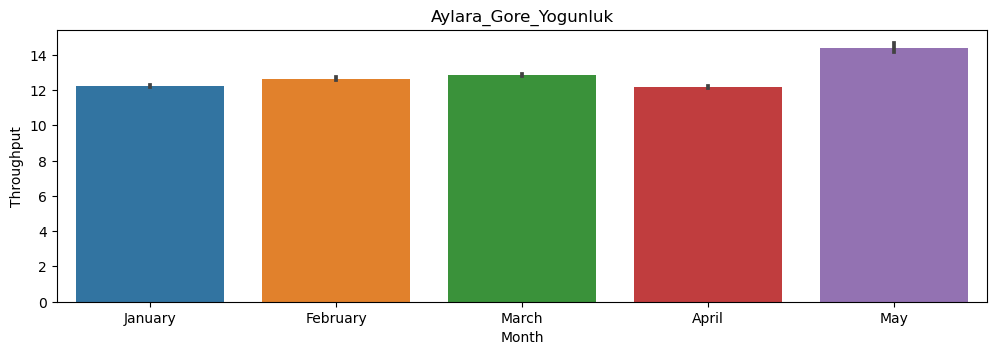

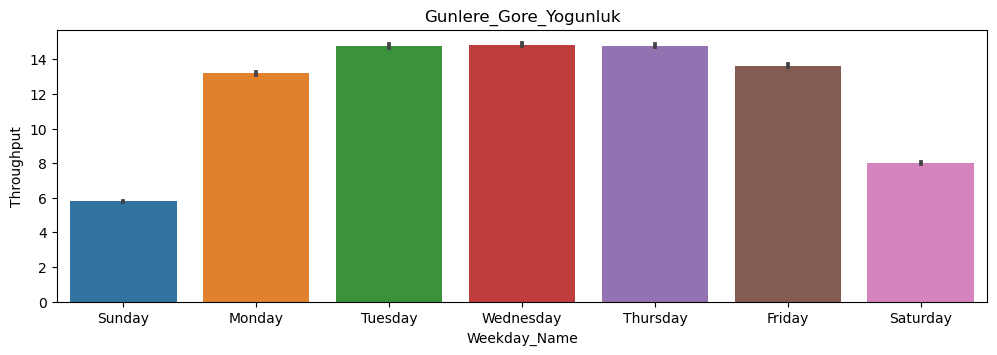

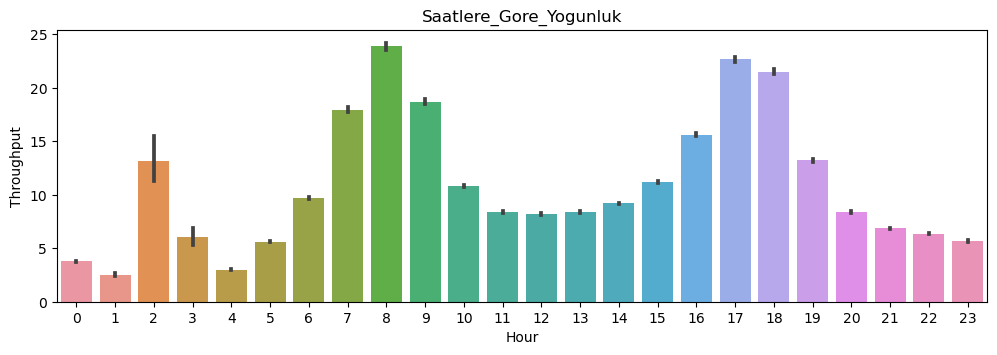

In [65]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(3,1,1)
ax=sns.barplot(x=df["Month_Name"],y=df["Throughput"])
ax.set_title("Aylara_Gore_Yogunluk")
ax.set_xlabel("Month")

fig=plt.figure(figsize=(12,12))
bx=fig.add_subplot(3,1,2)
bx=sns.barplot(x=df["Weekday_Name"],y=df["Throughput"])
bx.set_title("Gunlere_Gore_Yogunluk")

fig=plt.figure(figsize=(12,12))
cx=fig.add_subplot(3,1,3)
cx=sns.barplot(x=df["Hour"],y=df["Throughput"])
cx.set_title("Saatlere_Gore_Yogunluk")

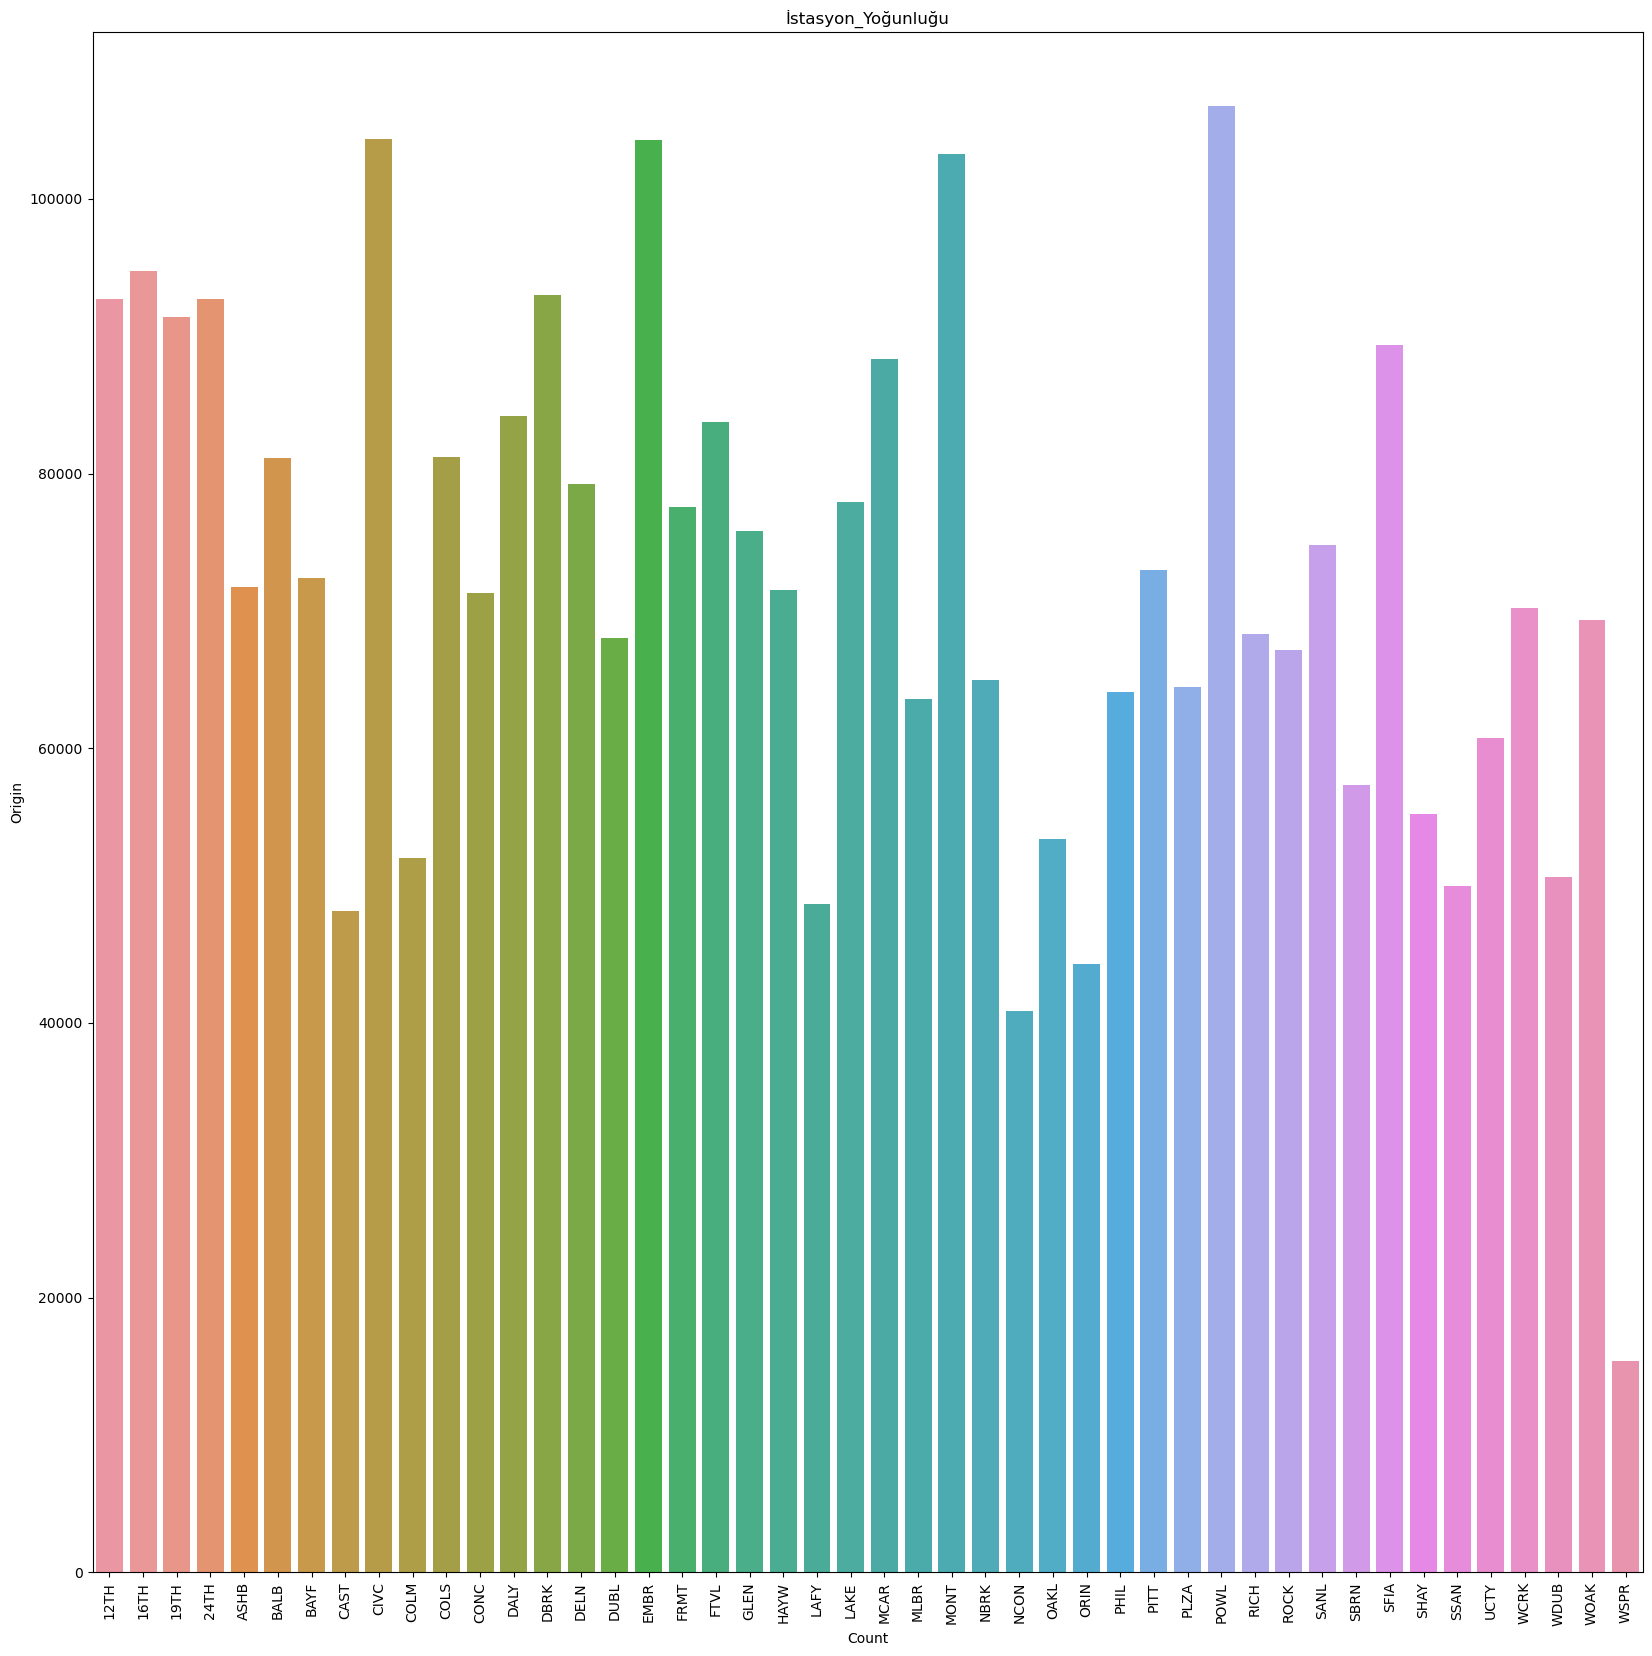

In [54]:
fig=plt.figure(figsize=(20, 20))
ax=sns.countplot(x=df["Origin"])  
ax.set_title("İstasyon_Yoğunluğu")
ax.set_xlabel("Count")
ax.set_ylabel("Origin")
plt.xticks(rotation=90);

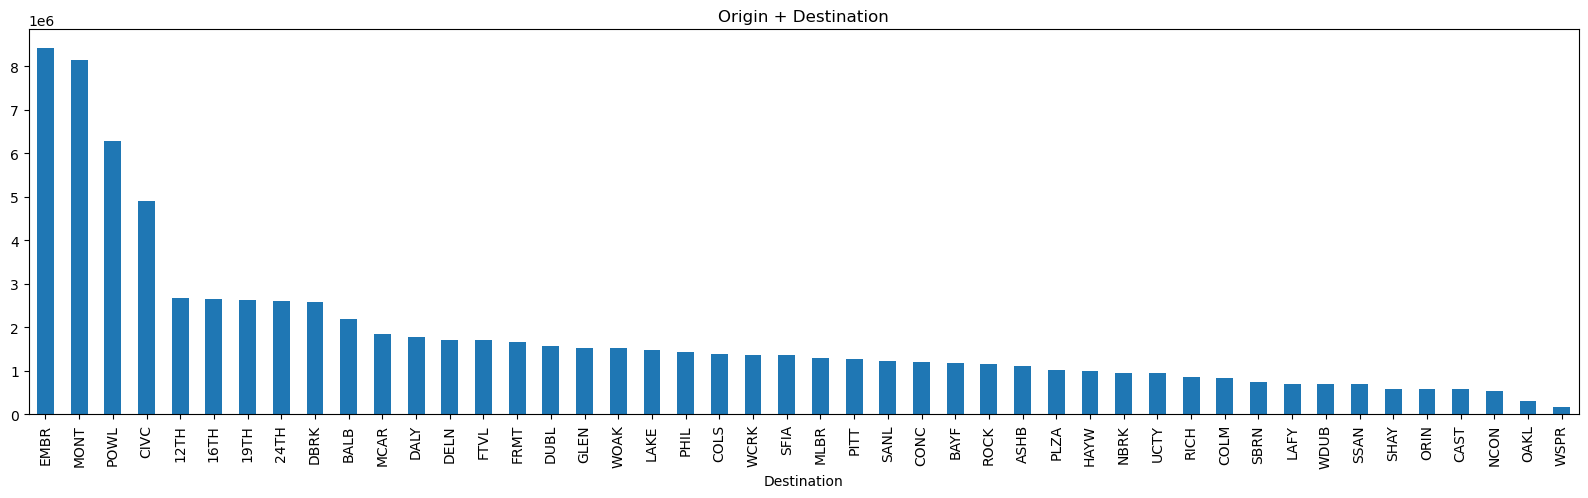

In [55]:
plt.figure(figsize=(20,5))
(df.groupby('Destination')['Throughput'].sum() + df.groupby('Origin')['Throughput'].sum()).sort_values(ascending=False).plot.bar()
plt.title('Origin + Destination');

In [69]:
x=df[["Month","Weekday","Hour"]]
y=df["Throughput"]

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
LR= LinearRegression()

In [72]:
pred=LR.fit(x_train,y_train).predict(x_test)

In [73]:
mean_squared_error(y_test,pred)**.5

33.147887730109126

In [74]:
r2_score(y_test,pred)

0.005045652416978963

In [75]:
!pip install pycaret

In [76]:
from pycaret.regression import*
ex_name=setup(data=df,target="Throughput")
best_model=compare_models()

Initiated  . . . . . . . . . . . . . . . . . .          15:29:44
Status     . . . . . . . . . . . . . . . . . .  Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Ridge Regression

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 